In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
df_columns = ['rainfall_min', 'rainfall_max', 'rainfall_mean', 'rainfall_median', 'rainfall_std']

In [37]:
def outlier(col):
    plt.figure()
    ax = plt.gca()
    ax.boxplot(col)
    ax.set_ylabel('Value')

def detect_outliers(data):
    # 1분위수, 3분위수, IQR 계산
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    iqr = q3 - q1

    # 이상치 경계 설정
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # 이상치 식별
    outliers = (data < lower_bound) | (data > upper_bound)

    return outliers

In [38]:
df_visitor = pd.read_csv("assets/output/visitors.csv")

In [39]:
df_visitor['visitor'] = df_visitor['visitor'].str.replace(',', '')

In [40]:
df_visitor['visitor'] = df_visitor['visitor'].astype(int)

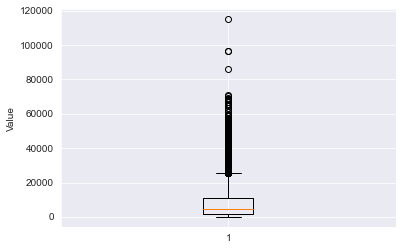

In [41]:
outlier(df_visitor['visitor'])

In [42]:
df_visitor.describe()

,visitor
count,3951.000000
mean,9122.186029
std,11653.034037
min,2.000000
25%,1840.000000
50%,4619.000000
75%,11280.500000
max,115002.000000


In [43]:
q1 = np.percentile(df_visitor['visitor'], 25)
q3 = np.percentile(df_visitor['visitor'], 75)
print("q1: {} q3: {}".format(q1, q3))

q1: 1840.0 q3: 11280.5


In [44]:
outliers = detect_outliers(df_visitor['visitor'])

In [45]:
non_outliers = df_visitor[~outliers]

In [46]:
non_outliers['visitor']

0       11483
1       14012
5        8374
6       13540
7       13507
        ...  
3946     2236
3947      925
3948      757
3949     2013
3950      628
Name: visitor, Length: 3586, dtype: int32

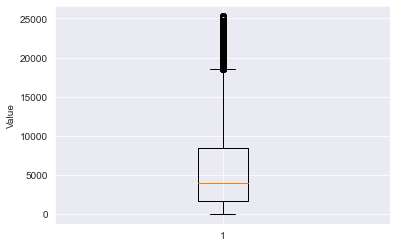

In [47]:
outlier(non_outliers['visitor'])

In [48]:
non_outliers.describe()

,visitor
count,3586.000000
mean,6098.088399
std,5901.432713
min,2.000000
25%,1692.250000
50%,3909.000000
75%,8441.000000
max,25286.000000


In [49]:
q1 = np.percentile(non_outliers['visitor'], 25)
q3 = np.percentile(non_outliers['visitor'], 75)
print("q1: {} q3: {}".format(q1, q3))

q1: 1692.25 q3: 8441.0


In [10]:
df = pd.read_csv('assets/output/encodingResult.csv')

In [11]:
df.describe()

,sulfur_dioxide_min,sulfur_dioxide_max,sulfur_dioxide_mean,sulfur_dioxide_median,carbon_monoxide_min,carbon_monoxide_max,carbon_monoxide_mean,carbon_monoxide_median,ozone_min,ozone_max,ozone_mean,ozone_median,nitrogen_dioxide_min,nitrogen_dioxide_max,nitrogen_dioxide_mean,nitrogen_dioxide_median,fine_dust_pm10_min,fine_dust_pm10_max,fine_dust_pm10_mean,fine_dust_pm10_median,rainfall_min,rainfall_max,rainfall_mean,rainfall_median,probability of precipitation_min,probability of precipitation_max,probability of precipitation_mean,probability of precipitation_median,humidity_min,humidity_max,humidity_mean,humidity_median,highest temperature_min,highest temperature_max,highest temperature_mean,highest temperature_median,lowest temperature_min,lowest temperature_max,lowest temperature_mean,lowest temperature_median,wind speed_min,wind speed_max,wind speed_mean,wind speed_median,sky state_min,sky state_max,sky state_mean,sky state_median,visitor,day,wind direction_min_0.0,wind direction_min_1.0,wind direction_min_2.0,wind direction_min_3.0,wind direction_min_4.0,wind direction_min_5.0,wind direction_min_6.0,wind direction_min_7.0,wind direction_min_8.0,wind direction_min_9.0,wind direction_min_10.0,wind direction_min_11.0,wind direction_min_12.0,wind direction_min_13.0,wind direction_min_14.0,wind direction_max_1.0,wind direction_max_2.0,wind direction_max_3.0,wind direction_max_4.0,wind direction_max_5.0,wind direction_max_6.0,wind direction_max_7.0,wind direction_max_8.0,wind direction_max_9.0,wind direction_max_10.0,wind direction_max_11.0,wind direction_max_12.0,wind direction_max_13.0,wind direction_max_14.0,wind direction_max_15.0,wind direction_max_16.0,wind direction_mean_0.0,wind direction_mean_1.0,wind direction_mean_2.0,wind direction_mean_3.0,wind direction_mean_4.0,wind direction_mean_5.0,wind direction_mean_6.0,wind direction_mean_7.0,wind direction_mean_8.0,wind direction_mean_9.0,wind direction_mean_10.0,wind direction_mean_11.0,wind direction_mean_12.0,wind direction_mean_13.0,wind direction_mean_14.0,wind direction_mean_15.0,wind direction_median_0.0,wind direction_median_1.0,wind direction_median_2.0,wind direction_median_3.0,wind direction_median_4.0,wind direction_median_5.0,wind direction_median_6.0,wind direction_median_7.0,wind direction_median_8.0,wind direction_median_9.0,wind direction_median_10.0,wind direction_median_11.0,wind direction_median_12.0,wind direction_median_13.0,wind direction_median_14.0,wind direction_median_15.0,wind direction_median_16.0,weekday_1.0,weekday_2.0,weekday_3.0,weekday_4.0,weekday_5.0,weekday_6.0,weekday_7.0
count,2.468000e+03,2.468000e+03,2.468000e+03,2.468000e+03,2.468000e+03,2.468000e+03,2.468000e+03,2.468000e+03,2.468000e+03,2.468000e+03,2.468000e+03,2.468000e+03,2.468000e+03,2.468000e+03,2.468000e+03,2.468000e+03,2.468000e+03,2.468000e+03,2.468000e+03,2.468000e+03,2.468000e+03,2.468000e+03,2.468000e+03,2.468000e+03,2.468000e+03,2.468000e+03,2.468000e+03,2.468000e+03,2.468000e+03,2.468000e+03,2.468000e+03,2.468000e+03,2.468000e+03,2.468000e+03,2.468000e+03,2.468000e+03,2.468000e+03,2.468000e+03,2.468000e+03,2.468000e+03,2.468000e+03,2.468000e+03,2.468000e+03,2.468000e+03,2.468000e+03,2.468000e+03,2.468000e+03,2.468000e+03,2468.000000,2.468000e+03,2468.0000,2468.000000,2468.000000,2468.000000,2468.000000,2468.000000,2468.000000,2468.000000,2468.000000,2468.000000,2468.000000,2468.000000,2468.000000,2468.000000,2468.000000,2468.000000,2468.000000,2468.000000,2468.000000,2468.000000,2468.000000,2468.000000,2468.000000,2468.000000,2468.000000,2468.000000,2468.000000,2468.000000,2468.000000,2468.000000,2468.000000,2468.000000,2468.000000,2468.000000,2468.000000,2468.000000,2468.000000,2468.000000,2468.000000,2468.000000,2468.000000,2468.000000,2468.000000,2468.000000,2468.000000,2468.000000,2468.000000,2468.000000,2468.000000,2468.000000,2468.000000,2468.000000,2468.000000,2468.000000,2468.000000,2468.000000,2468.000000,2468.000000,2468.000000,2468.000000,2468.000000,2468.00000

In [13]:
df_temp = df.drop('date', axis=1)

In [14]:
df_temp['visitor']

0        8856
1       24046
2        6640
3       24458
4        8118
5       13247
6       19622
7       19035
8       22131
9       14961
10       3528
11       9663
12      26175
13       4158
14       3583
15       7342
16      14249
17      13796
18      14138
19       8302
20      20978
21       2577
22       3123
23       3086
24       2002
25       2531
26       6749
27      16491
28       2152
29       1835
30       1885
31       2051
32        206
33       8553
34       4729
35        969
36       3752
37        791
38       2581
39       1119
40       1509
41      11871
42      28519
43       3503
44       3243
45       3150
46       2691
47        603
48       6916
49      18053
50       1588
51       4048
52       2486
53       2309
54       6246
55      17703
56       4077
57       2070
58       2535
59       1620
60       4352
61       4641
62       5459
63       9383
64       6523
65       5633
66      14036
67      17786
68      23793
69       8748
70       3126
71    

In [54]:
# df_temp['visitor'] = df_temp['visitor'].str.replace(',', '')
# df_temp['visitor'] = df_temp['visitor'].astype(int)

(array([2.992e+03, 5.250e+02, 2.460e+02, 1.050e+02, 5.600e+01, 2.000e+01,
        3.000e+00, 1.000e+00, 2.000e+00, 1.000e+00]),
 array([2.00000e+00, 1.15020e+04, 2.30020e+04, 3.45020e+04, 4.60020e+04,
        5.75020e+04, 6.90020e+04, 8.05020e+04, 9.20020e+04, 1.03502e+05,
        1.15002e+05]),
 <BarContainer object of 10 artists>)

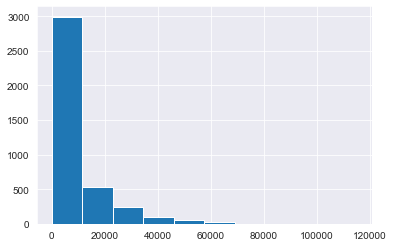

In [55]:
plt.hist(df_temp['visitor'])

In [56]:
df_temp

,sulfur_dioxide_min,sulfur_dioxide_max,sulfur_dioxide_mean,sulfur_dioxide_median,sulfur_dioxide_std,carbon_monoxide_min,carbon_monoxide_max,carbon_monoxide_mean,carbon_monoxide_median,carbon_monoxide_std,...,sky state_median_2.0,sky state_median_3.0,sky state_median_4.0,weekday_1.0,weekday_2.0,weekday_3.0,weekday_4.0,weekday_5.0,weekday_6.0,weekday_7.0
0,-0.103174,-0.610634,-0.464415,-0.537652,-0.720722,-1.369441,-0.158715,-0.528510,-0.402259,0.820602,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,-0.670446,0.226266,-0.221451,-0.166854,0.238398,-1.946222,-0.852389,-1.052815,-0.805120,-0.270850,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.464098,0.226266,0.158179,0.203943,-0.082826,-0.792661,-0.852389,-0.748380,-0.805120,-0.633946,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.464098,0.226266,0.461884,0.574741,0.123268,-0.792661,-0.621164,-0.714554,-0.603689,-0.473053,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.031370,0.435491,0.674477,0.574741,0.044930,-0.792661,-0.621164,-0.663815,-0.402259,-0.464889,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3946,1.371733,0.812096,1.202923,1.205096,0.563057,0.476256,1.228633,1.264271,1.249470,0.941551,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3947,0.804461,0.602871,0.808107,0.834299,0.277685,-0.446593,0.026265,-0.027885,0.040888,0.217493,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3948,0.123735,0.393646,0.337365,0.278103,1.187247,-0.215880,0.303735,-0.024502,-0.160543,0.577397,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3949,2.165914,1.690840,2.101889,2.206250,0.977355,1.514461,1.136144,1.484141,1.370328,0.748558,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


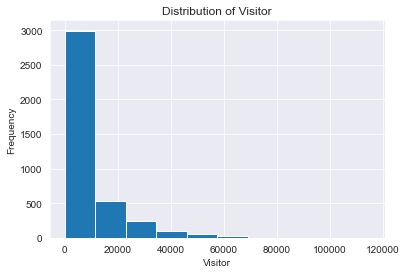

In [57]:
plt.hist(df['visitor'], bins=10)
plt.xlabel('Visitor')
plt.ylabel('Frequency')
plt.title('Distribution of Visitor')
plt.show()

In [58]:
df_temp['visitor'].sort_values()

1933         2.0
2912         2.0
2913         7.0
822          9.0
1922        11.0
          ...   
192      70880.0
1985     86100.0
581      96434.0
96       96434.0
922     115002.0
Name: visitor, Length: 3951, dtype: float64

In [59]:
df_temp['visitor'].sort_values(ascending=False)

922     115002.0
96       96434.0
581      96434.0
1985     86100.0
192      70880.0
          ...   
1922        11.0
822          9.0
2913         7.0
1933         2.0
2912         2.0
Name: visitor, Length: 3951, dtype: float64

In [15]:
df_temp['visitor'].describe()

count     2468.000000
mean      6265.615883
std       6517.450854
min          2.000000
25%       1645.750000
50%       3746.000000
75%       8229.500000
max      29944.000000
Name: visitor, dtype: float64

In [16]:
df_temp.corr()['visitor']

sulfur_dioxide_min                    -0.070554
sulfur_dioxide_max                    -0.032072
sulfur_dioxide_mean                   -0.055741
sulfur_dioxide_median                 -0.056247
carbon_monoxide_min                   -0.119912
carbon_monoxide_max                   -0.141581
carbon_monoxide_mean                  -0.142012
carbon_monoxide_median                -0.127357
ozone_min                             -0.017234
ozone_max                              0.227335
ozone_mean                             0.184809
ozone_median                           0.127220
nitrogen_dioxide_min                  -0.088284
nitrogen_dioxide_max                   0.034491
nitrogen_dioxide_mean                 -0.049791
nitrogen_dioxide_median               -0.060904
fine_dust_pm10_min                    -0.017997
fine_dust_pm10_max                     0.005263
fine_dust_pm10_mean                   -0.005822
fine_dust_pm10_median                 -0.010486
rainfall_min                          -0

In [62]:
# import seaborn as sns
# import matplotlib.pyplot as plt
#
# # 히트맵 크기 조정
# plt.figure(figsize=(32, 24))
# sns.set(font_scale=1.2)
#
# # 히트맵 그리기
# correlation_matrix = df_temp.corr()
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
#
# # x축과 y축 레이블 회전
# plt.xticks(rotation=45)
# plt.yticks(rotation=0)
#
# # 그래프 제목 설정
# plt.title('Correlation Matrix')
#
# # 그래프 출력
# plt.show()

In [18]:
# df.corr 기본 값은 pearson입니다
df_corr = df_temp.corr()

In [19]:
# row 생략 없이 출력
pd.set_option('display.max_rows', None)
# col 생략 없이 출력
pd.set_option('display.max_columns', None)
pearson = np.abs(df_corr['visitor'])
print(pearson)

#ozone_max, nitrogen_dioxide_max, lowest temperature_min, highest temperature_max,fine_dust_pm10_min ,humidity_mean,carbon_monoxide_max, wind direction_min
# sulfur_dioxide_min, rainfall_max, probability of precipitation_max, wind speed_max 

sulfur_dioxide_min                     0.070554
sulfur_dioxide_max                     0.032072
sulfur_dioxide_mean                    0.055741
sulfur_dioxide_median                  0.056247
carbon_monoxide_min                    0.119912
carbon_monoxide_max                    0.141581
carbon_monoxide_mean                   0.142012
carbon_monoxide_median                 0.127357
ozone_min                              0.017234
ozone_max                              0.227335
ozone_mean                             0.184809
ozone_median                           0.127220
nitrogen_dioxide_min                   0.088284
nitrogen_dioxide_max                   0.034491
nitrogen_dioxide_mean                  0.049791
nitrogen_dioxide_median                0.060904
fine_dust_pm10_min                     0.017997
fine_dust_pm10_max                     0.005263
fine_dust_pm10_mean                    0.005822
fine_dust_pm10_median                  0.010486
rainfall_min                           0

## 상관도 높은 순서: 주말, 오존, 온도
## sulfur_dioxide -> min, carbon_monoxide -> max, ozone -> max, nitrogen_dioxide -> min, fine_dust -> median, rainfall -> mean,
## probability of precipitation -> min, humidity -> min, highest temp -> max, lowest temp -> min, wind speed -> min, wind direction -> min, skystate -> max

In [9]:
df_temp.corr(method='kendall')['visitor']

sulfur_dioxide_min      -0.116007
sulfur_dioxide_max      -0.015797
sulfur_dioxide_mean     -0.040749
sulfur_dioxide_median   -0.048785
carbon_monoxide_min     -0.052174
                           ...   
weekday_3.0             -0.112544
weekday_4.0             -0.101523
weekday_5.0             -0.047098
weekday_6.0              0.259337
weekday_7.0              0.220517
Name: visitor, Length: 100, dtype: float64

## 상관도 높은 순서: 주말, 오존, 온도, 습도
## sulfur_dioxide -> min, carbon_monoxide -> max, ozone -> max, nitrogen_dioxide -> max, fine_dust -> max, rainfall -> mean,
## probability of precipitation -> min, humidity -> min, highest temp -> max, lowest temp -> min, wind speed -> median,
## wind direction -> min, skystate -> max

In [10]:
df_temp.corr(method='spearman')['visitor']

sulfur_dioxide_min      -0.152076
sulfur_dioxide_max      -0.022849
sulfur_dioxide_mean     -0.063964
sulfur_dioxide_median   -0.069535
carbon_monoxide_min     -0.071462
                           ...   
weekday_3.0             -0.137790
weekday_4.0             -0.124296
weekday_5.0             -0.057663
weekday_6.0              0.317509
weekday_7.0              0.269981
Name: visitor, Length: 100, dtype: float64

## 상관도 높은 순서: 오존, 온도, 습도 & 일산화탄소
## sulfur_dioxide -> min, carbon_monoxide -> max, ozone -> max, nitrogen_dioxide -> max, fine_dust -> max, rainfall -> mean,
## probability of precipitation -> min, humidity -> min, highest temp -> max, lowest temp -> min, wind speed -> mean med유사,
## wind direction -> min, skystate -> max

# 종합
## sulfur_dioxide -> min, carbon_monoxide -> max, ozone -> max, nitrogen_dioxide -> max, fine_dust -> max, rainfall -> mean,
## probability of precipitation -> min, humidity -> min, highest temp -> max, lowest temp -> min, wind speed -> med,
## wind direction -> min, skystate -> max

In [67]:
selected_feat = ['sulfur_dioxide_min', 'carbon_monoxide_max', 'ozone_max', 'nitrogen_dioxide_max', 'fine_dust_pm10_max',                 'rainfall_mean', 'probability of precipitation_min', 'humidity_min', 'highest temperature_max',                 'lowest temperature_min', 'wind speed_median', 'visitor']

In [68]:
df_selected = df[selected_feat]

In [69]:
df_selected.corr().iloc[:,-1]

sulfur_dioxide_min                 -0.021263
carbon_monoxide_max                -0.110792
ozone_max                           0.265874
nitrogen_dioxide_max                0.090950
fine_dust_pm10_max                  0.023442
rainfall_mean                      -0.050165
probability of precipitation_min    0.035505
humidity_min                        0.074496
highest temperature_max             0.175116
lowest temperature_min              0.173374
wind speed_median                  -0.055486
visitor                             1.000000
Name: visitor, dtype: float64

In [70]:
df_selected.corr(method='kendall').iloc[:,-1]

sulfur_dioxide_min                 -0.090991
carbon_monoxide_max                -0.098737
ozone_max                           0.259777
nitrogen_dioxide_max                0.059088
fine_dust_pm10_max                  0.028219
rainfall_mean                       0.020338
probability of precipitation_min    0.055104
humidity_min                        0.091097
highest temperature_max             0.178483
lowest temperature_min              0.176299
wind speed_median                  -0.072114
visitor                             1.000000
Name: visitor, dtype: float64

In [71]:
df_selected.corr(method='spearman').iloc[:,-1]

sulfur_dioxide_min                 -0.125357
carbon_monoxide_max                -0.148388
ozone_max                           0.390589
nitrogen_dioxide_max                0.087642
fine_dust_pm10_max                  0.042020
rainfall_mean                       0.027557
probability of precipitation_min    0.073442
humidity_min                        0.131807
highest temperature_max             0.262179
lowest temperature_min              0.257423
wind speed_median                  -0.103605
visitor                             1.000000
Name: visitor, dtype: float64

In [72]:
abs(df_selected.corr().iloc[:,-1])

sulfur_dioxide_min                  0.021263
carbon_monoxide_max                 0.110792
ozone_max                           0.265874
nitrogen_dioxide_max                0.090950
fine_dust_pm10_max                  0.023442
rainfall_mean                       0.050165
probability of precipitation_min    0.035505
humidity_min                        0.074496
highest temperature_max             0.175116
lowest temperature_min              0.173374
wind speed_median                   0.055486
visitor                             1.000000
Name: visitor, dtype: float64

In [73]:
abs(df_temp.corr(method='kendall')['visitor'])

sulfur_dioxide_min       0.090991
sulfur_dioxide_max       0.026713
sulfur_dioxide_mean      0.050574
sulfur_dioxide_median    0.057604
sulfur_dioxide_std       0.055543
                           ...   
weekday_3.0              0.098525
weekday_4.0              0.081009
weekday_5.0              0.038320
weekday_6.0              0.213039
weekday_7.0              0.219046
Name: visitor, Length: 116, dtype: float64

In [74]:
abs(df_temp.corr(method='spearman')['visitor'])

sulfur_dioxide_min       0.125357
sulfur_dioxide_max       0.040178
sulfur_dioxide_mean      0.079862
sulfur_dioxide_median    0.085453
sulfur_dioxide_std       0.083915
                           ...   
weekday_3.0              0.120649
weekday_4.0              0.099199
weekday_5.0              0.046925
weekday_6.0              0.260876
weekday_7.0              0.268231
Name: visitor, Length: 116, dtype: float64

In [78]:
df_temp['highest temperature_max'].describe()

count    3.951000e+03
mean    -4.018271e-16
std      1.000127e+00
min     -2.604460e+00
25%     -8.658486e-01
50%      1.966364e-01
75%      8.727631e-01
max      1.838659e+00
Name: highest temperature_max, dtype: float64